🔬 Toryum 232 Dönüşümünün İstatistiksel Modellemesi - Eğitim Projesi
✅ Sentetik veri oluşturuldu: synthetic_counts.csv
🔹 Veri boyutu: (200, 4)
   t  counts  true_signal  background
0  0     103   100.000000           7
1  1     117   103.015075           7
2  2     101   106.030151           7
3  3     119   109.045226           7
4  4     131   112.060302           7

📊 Temel İstatistikler:
                 t      counts  true_signal  background
count  200.000000  200.000000   200.000000       200.0
mean    99.500000  406.090000   400.000000         7.0
std     57.879185  173.430252   174.510104         0.0
min      0.000000  101.000000   100.000000         7.0
25%     49.750000  257.250000   250.000000         7.0
50%     99.500000  408.500000   400.000000         7.0
75%    149.250000  547.250000   550.000000         7.0
max    199.000000  727.000000   700.000000         7.0


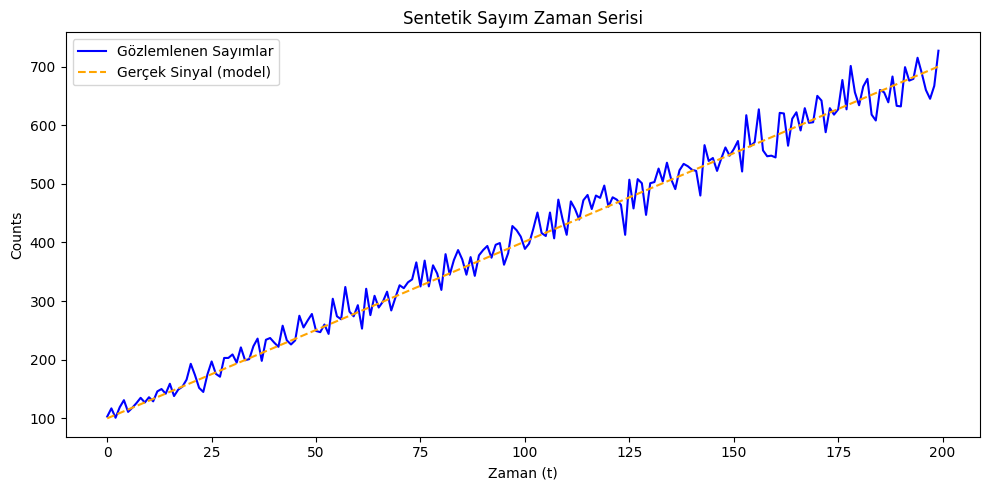

💾 Görsel kaydedildi: plot_timeseries.png
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 counts   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.1
Date:                Thu, 06 Nov 2025   Deviance:                       1023.8
Time:                        21:16:06   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept

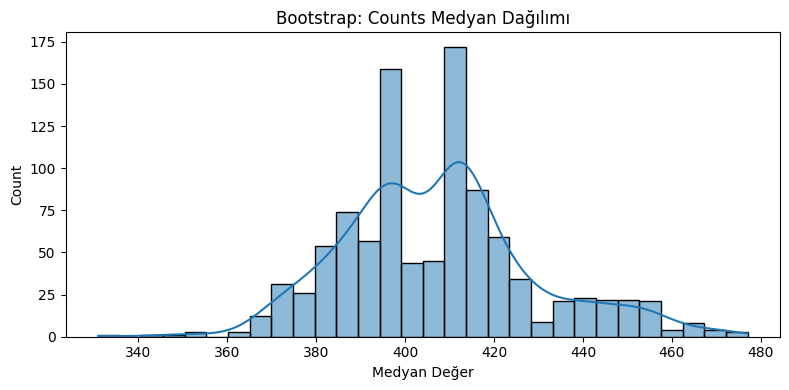

💾 Görsel kaydedildi: plot_bootstrap.png


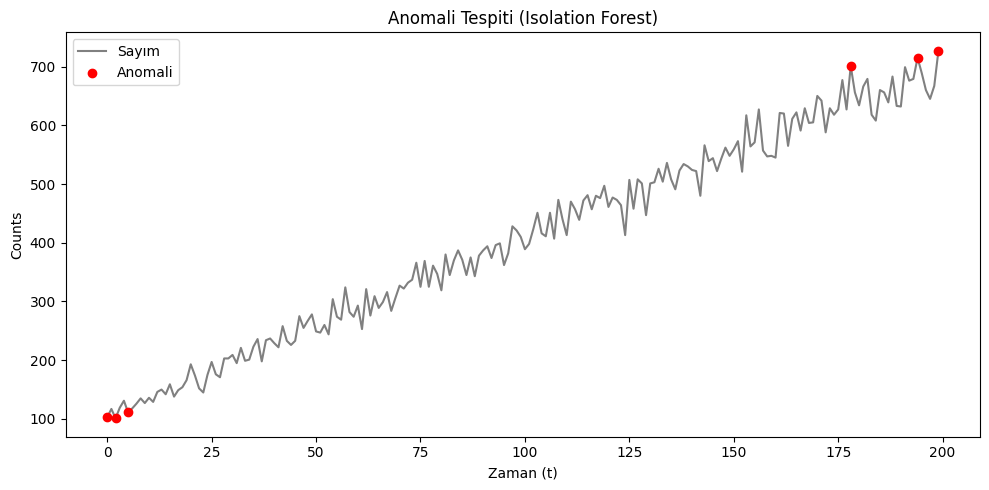

💾 Görsel kaydedildi: plot_anomalies.png
🔸 Bulunan anomali sayısı: 6

🎯 Eğitim tamamlandı. Tüm çıktılar kaydedildi.



In [1]:
# ============================================================
# Toryum 232 Dönüşümünün İstatistiksel Modellemesi
# Eğitim Amaçlı Veri Bilimi Projesi
# ============================================================
# Yürütücü Adayı: Yusuf Erim Yaşar
# Proje Fikir Sahibi ve Gönüllüsü: Meriç Özcan
# ------------------------------------------------------------
# Amaç:
# Toryum-232 → Protaktinyum-233 → Uranyum-233 dönüşüm zincirini
# sadece sentetik veriler ve istatistiksel modelleme teknikleriyle
# temsil eden bir eğitim simülasyonu oluşturmaktır.
# Gerçek nükleer deney, üretim veya işlem içermez.
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# ============================================================
# 1. SENTETİK VERİ OLUŞTURMA
# ============================================================

def create_synthetic_data():
    np.random.seed(42)
    t = np.arange(0, 200)
    true_signal = np.linspace(100, 700, 200)
    background = np.full(200, 7)
    counts = np.random.poisson(lam=true_signal + background)

    df = pd.DataFrame({
        "t": t,
        "counts": counts,
        "true_signal": true_signal,
        "background": background
    })
    df.to_csv("synthetic_counts.csv", index=False)
    print("✅ Sentetik veri oluşturuldu: synthetic_counts.csv")
    return df

# ============================================================
# 2. VERİYİ YÜKLE VE TEMEL ANALİZ
# ============================================================

def load_and_describe():
    df = pd.read_csv("synthetic_counts.csv")
    print("🔹 Veri boyutu:", df.shape)
    print(df.head())
    print("\n📊 Temel İstatistikler:\n", df.describe())
    return df

# ============================================================
# 3. GÖRSELLEŞTİRME
# ============================================================

def visualize_data(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df["t"], df["counts"], label="Gözlemlenen Sayımlar", color="blue")
    plt.plot(df["t"], df["true_signal"], label="Gerçek Sinyal (model)", color="orange", linestyle="--")
    plt.title("Sentetik Sayım Zaman Serisi")
    plt.xlabel("Zaman (t)")
    plt.ylabel("Counts")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plot_timeseries.png", dpi=300)
    plt.show()
    print("💾 Görsel kaydedildi: plot_timeseries.png")

# ============================================================
# 4. POISSON REGRESYON (EĞİTİM AMAÇLI)
# ============================================================

def poisson_glm(df):
    try:
        import statsmodels.api as sm
        import statsmodels.formula.api as smf
        model = smf.glm(formula="counts ~ true_signal", data=df, family=sm.families.Poisson()).fit()
        print(model.summary())
        print("✅ Poisson GLM başarıyla çalıştı.")
    except Exception as e:
        print("⚠️ Poisson GLM çalıştırılamadı:", e)
        print("Statsmodels paketini kurmak için: pip install statsmodels")

# ============================================================
# 5. BOOTSTRAP ANALİZİ
# ============================================================

def bootstrap_analysis(df, n_boot=1000):
    rng = np.random.default_rng(123)
    medians = [np.median(rng.choice(df["counts"], size=len(df), replace=True)) for _ in range(n_boot)]

    plt.figure(figsize=(8, 4))
    sns.histplot(medians, bins=30, kde=True)
    plt.title("Bootstrap: Counts Medyan Dağılımı")
    plt.xlabel("Medyan Değer")
    plt.tight_layout()
    plt.savefig("plot_bootstrap.png", dpi=300)
    plt.show()
    print("💾 Görsel kaydedildi: plot_bootstrap.png")

# ============================================================
# 6. ANOMALİ TESPİTİ (ISOLATION FOREST)
# ============================================================

def anomaly_detection(df):
    try:
        from sklearn.ensemble import IsolationForest
        model = IsolationForest(contamination=0.03, random_state=42)
        df["anomaly"] = model.fit_predict(df[["counts"]])
        df["anomaly"] = df["anomaly"].apply(lambda x: 1 if x == -1 else 0)

        plt.figure(figsize=(10, 5))
        plt.plot(df["t"], df["counts"], label="Sayım", color="gray")
        anomalies = df[df["anomaly"] == 1]
        plt.scatter(anomalies["t"], anomalies["counts"], color="red", label="Anomali", zorder=5)
        plt.title("Anomali Tespiti (Isolation Forest)")
        plt.xlabel("Zaman (t)")
        plt.ylabel("Counts")
        plt.legend()
        plt.tight_layout()
        plt.savefig("plot_anomalies.png", dpi=300)
        plt.show()
        print("💾 Görsel kaydedildi: plot_anomalies.png")
        print("🔸 Bulunan anomali sayısı:", df['anomaly'].sum())
    except Exception as e:
        print("⚠️ Anomali tespiti başarısız:", e)
        print("Scikit-learn yüklemek için: pip install scikit-learn")

# ============================================================
# 7. ANA ÇALIŞMA AKIŞI
# ============================================================

def main():
    print("🔬 Toryum 232 Dönüşümünün İstatistiksel Modellemesi - Eğitim Projesi")
    df = create_synthetic_data()
    df = load_and_describe()
    visualize_data(df)
    poisson_glm(df)
    bootstrap_analysis(df)
    anomaly_detection(df)
    print("\n🎯 Eğitim tamamlandı. Tüm çıktılar kaydedildi.\n")

if __name__ == "__main__":
    main()
